<a href="https://colab.research.google.com/github/reddyanahitha/walmart-sales-machine-learning/blob/main/assignment2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install pandas
!pip install numpy


In [2]:
import pandas as pd
import numpy as np

In [3]:
#Loading the dataset into dataframe
df=pd.read_csv('Customer_Data.csv')
print(df.head())

   Customer ID  Age Gender  Annual Income  Spending Score
0            1   62   Male          56564              86
1            2   65   Male          25393              73
2            3   18   Male         143520              39
3            4   21   Male          64711              43
4            5   21   Male         147014              98


In [4]:
#Structure of the dataset
print("Shape of the dataset:",df.shape)
print("Column names:",df.columns)

Shape of the dataset: (1000, 5)
Column names: Index(['Customer ID', 'Age', 'Gender', 'Annual Income', 'Spending Score'], dtype='object')


In [5]:
#checking the missing values
missing=df.isnull().sum()
print(missing)

Customer ID       0
Age               0
Gender            0
Annual Income     0
Spending Score    0
dtype: int64


In [6]:
#Summarize the data
print(df.describe())

       Customer ID          Age  Annual Income  Spending Score
count  1000.000000  1000.000000    1000.000000     1000.000000
mean    500.500000    43.267000   84856.809000       47.859000
std     288.819436    15.242311   38393.323903       28.606038
min       1.000000    18.000000   20359.000000        1.000000
25%     250.750000    30.000000   51173.750000       23.000000
50%     500.500000    43.000000   84462.000000       47.000000
75%     750.250000    56.000000  118356.250000       73.000000
max    1000.000000    69.000000  149870.000000       99.000000


In [7]:
!pip install matplotlib
!pip install seaborn
import matplotlib.pyplot as plt
import seaborn as sns

Text(0.5, 1.0, 'Distribution of Spending Score')

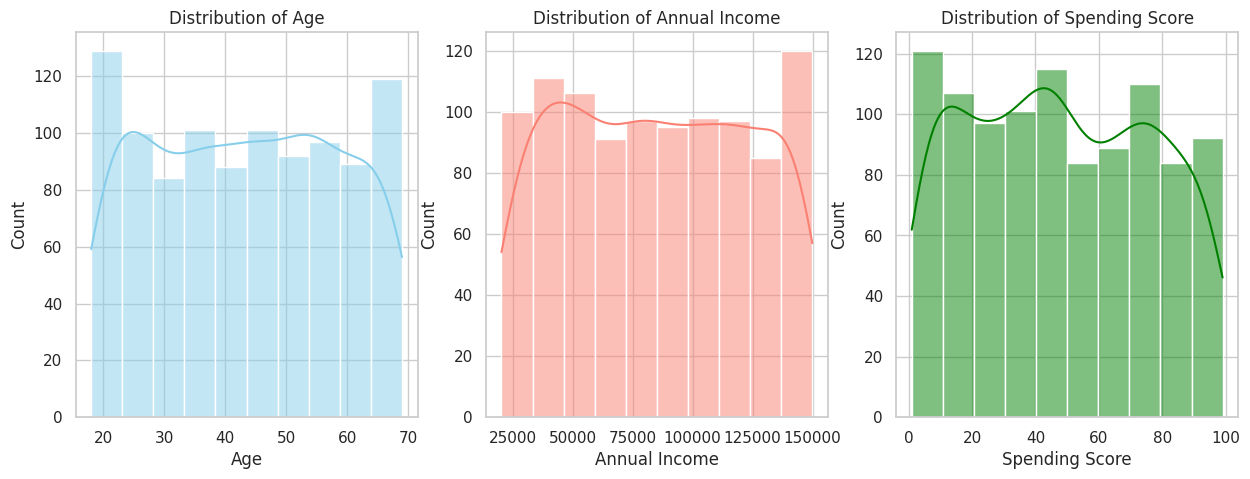

In [8]:
sns.set(style="whitegrid")
plt.figure(figsize=(15,5))
#numerical variables visualization
plt.subplot(1,3,1)
sns.histplot(df['Age'],bins=10,kde=True,color='skyblue')
plt.title('Distribution of Age')

plt.subplot(1,3,2)
sns.histplot(df['Annual Income'],bins=10,kde=True,color='salmon')
plt.title('Distribution of Annual Income')

plt.subplot(1,3,3)
sns.histplot(df['Spending Score'],bins=10,kde=True,color='green')
plt.title('Distribution of Spending Score')

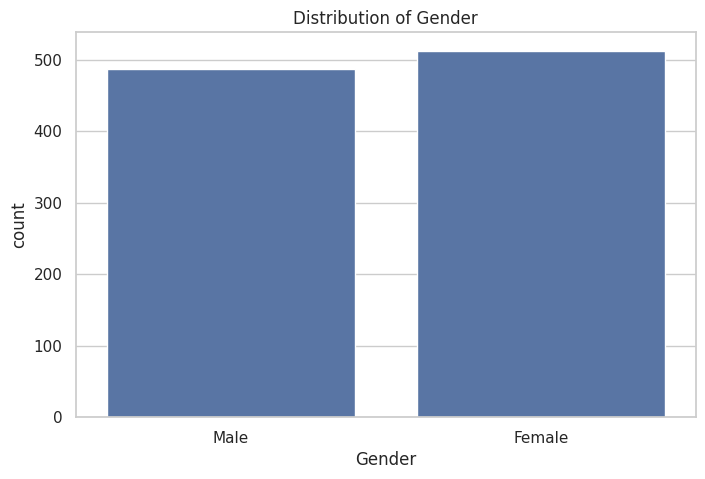

In [9]:
#categorical variable visualization
plt.figure(figsize=(8,5))
sns.countplot(data=df,x='Gender')
plt.title('Distribution of Gender')
plt.show()

In [10]:
!pip install scikit-learn
from sklearn.preprocessing import StandardScaler, LabelEncoder

In [11]:
#encode categorical variable
label=LabelEncoder()
df['Gender']=label.fit_transform(df['Gender'])
print(df.head())

   Customer ID  Age  Gender  Annual Income  Spending Score
0            1   62       1          56564              86
1            2   65       1          25393              73
2            3   18       1         143520              39
3            4   21       1          64711              43
4            5   21       1         147014              98


In [12]:
#normalize numerical variables
scaler=StandardScaler()
num=['Age','Annual Income','Spending Score']
df[num]=scaler.fit_transform(df[num])
print(df.head())

   Customer ID       Age  Gender  Annual Income  Spending Score
0            1  1.229628       1      -0.737289        1.333987
1            2  1.426547       1      -1.549581        0.879310
2            3 -1.658518       1       1.528717       -0.309845
3            4 -1.461599       1      -0.524984       -0.169944
4            5 -1.461599       1       1.619768        1.753689


In [13]:
from sklearn.model_selection import train_test_split

In [14]:
X= df.drop(columns=['Customer ID'])
y=df['Customer ID']
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=42)
print(X_train.shape)
print(X_test.shape)

(800, 4)
(200, 4)


In [15]:
from sklearn.cluster import KMeans
kmeans=KMeans(random_state=42)
inertia=[]
for k in range(1,11):
    kmeans=KMeans(n_clusters=k,random_state=42)
    kmeans.fit(X_train)
    inertia.append(kmeans.inertia_)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

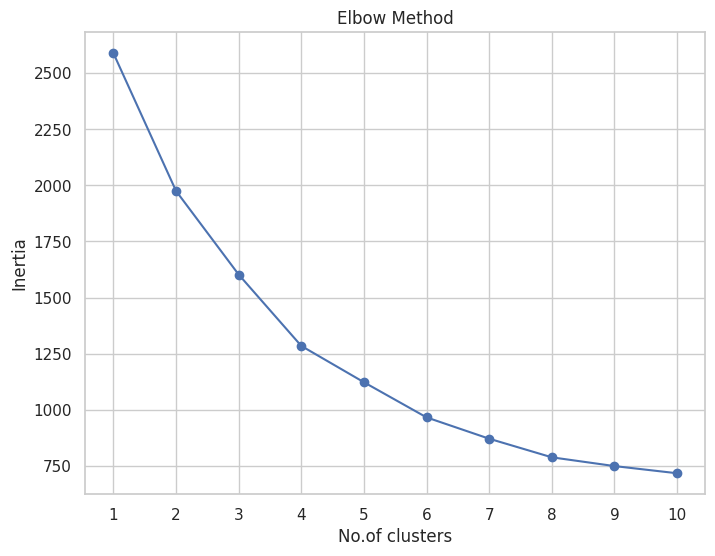

In [16]:
plt.figure(figsize=(8,6))
plt.plot(range(1,11),inertia,marker='o')
plt.title('Elbow Method')
plt.xlabel('No.of clusters')
plt.ylabel('Inertia')
plt.xticks(np.arange(1,11,1))
plt.show()

In [17]:
k=5
kmeans=KMeans(n_clusters=k,random_state=42)
kmeans.fit(X_train)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


KMeans(n_clusters=5, random_state=42)

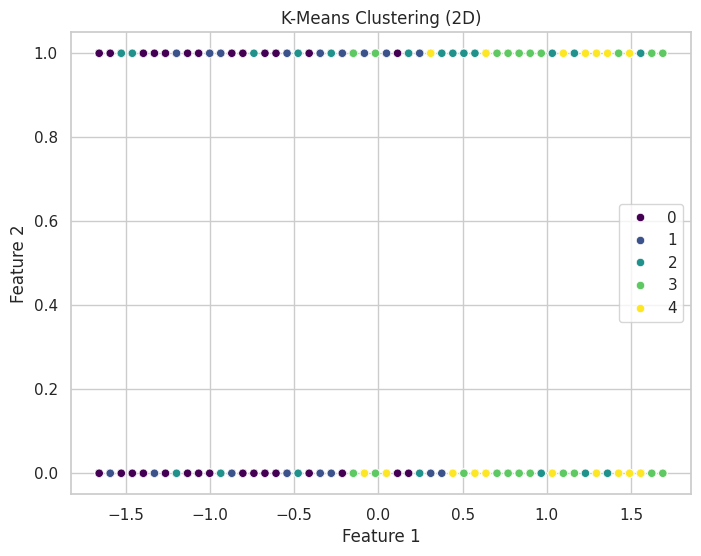

In [18]:
plt.figure(figsize=(8,6))
sns.scatterplot(x=X_train.iloc[:,0],y=X_train.iloc[:,1],hue=kmeans.labels_,palette='viridis',legend='full')
plt.title('K-Means Clustering (2D)')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.show()

In [19]:
from sklearn.metrics import silhouette_score,davies_bouldin_score
silhouette=silhouette_score(X_train,kmeans.labels_)
print(silhouette)

0.23938393558789123


In [20]:
davies=davies_bouldin_score(X_train,kmeans.labels_)
print(davies)

1.2370478276957144


In [21]:
"""
Discussion of strengths and limitations of K-means clustering
 Strengths:
 - K-means is computationally efficient and scales well to large datasets.
 - It is simple to implement and easy to understand.
 - K-means can produce tight clusters if the data is well-separated and spherical in shape.

 Limitations:
 - K-means requires the number of clusters (k) to be specified in advance, which can be challenging in practice.
 - It assumes that clusters are isotropic and have similar densities, which may not always hold true.
 - K-means is sensitive to the initial choice of cluster centers and may converge to suboptimal solutions.
 """

'\nDiscussion of strengths and limitations of K-means clustering\n Strengths:\n - K-means is computationally efficient and scales well to large datasets.\n - It is simple to implement and easy to understand.\n - K-means can produce tight clusters if the data is well-separated and spherical in shape.\n\n Limitations:\n - K-means requires the number of clusters (k) to be specified in advance, which can be challenging in practice.\n - It assumes that clusters are isotropic and have similar densities, which may not always hold true.\n - K-means is sensitive to the initial choice of cluster centers and may converge to suboptimal solutions.\n '

In [22]:
"""
Insights and Recommendations
 Based on the clustering results, we have identified distinct customer segments. Let's provide actionable insights and marketing strategies tailored to each segment:

 Cluster 0: High Spending Customers
 - Offer premium loyalty programs or rewards to encourage repeat purchases.
 - Introduce exclusive products or services targeting this segment.
 - Personalize marketing communications to enhance engagement.

 Cluster 1: Moderate Spending Customers
 - Provide targeted discounts or promotions to incentivize higher spending.
 - Implement referral programs to increase customer acquisition.
 - Improve product visibility through targeted advertising campaigns.

 Cluster 2: Low Spending Customers
 - Offer introductory discounts or bundle deals to attract this segment.
 - Focus on improving the value proposition of products or services.
 - Gather feedback to understand barriers to spending and address customer concerns.

 Cluster 3: High Income, Low Spending Customers
 - Create personalized experiences to entice this segment to spend more.
 - Showcase the luxury aspects of products or services to appeal to their higher income.
 - Offer exclusive perks or benefits to increase loyalty.

 Cluster 4: Low Income, High Spending Customers
 - Provide budget-friendly options or payment plans to accommodate their spending habits.
 - Focus on building brand loyalty through exceptional customer service.
 - Implement targeted marketing campaigns emphasizing affordability and value.

 The company can use these insights to tailor marketing strategies and improve customer engagement:
 - Personalize marketing messages and offers based on the characteristics of each customer segment.
 - Utilize customer segmentation for targeted advertising and promotional campaigns.
 - Continuously analyze customer feedback and interactions to refine marketing strategies and offerings.
"""

"\nInsights and Recommendations\n Based on the clustering results, we have identified distinct customer segments. Let's provide actionable insights and marketing strategies tailored to each segment:\n\n Cluster 0: High Spending Customers\n - Offer premium loyalty programs or rewards to encourage repeat purchases.\n - Introduce exclusive products or services targeting this segment.\n - Personalize marketing communications to enhance engagement.\n\n Cluster 1: Moderate Spending Customers\n - Provide targeted discounts or promotions to incentivize higher spending.\n - Implement referral programs to increase customer acquisition.\n - Improve product visibility through targeted advertising campaigns.\n\n Cluster 2: Low Spending Customers\n - Offer introductory discounts or bundle deals to attract this segment.\n - Focus on improving the value proposition of products or services.\n - Gather feedback to understand barriers to spending and address customer concerns.\n\n Cluster 3: High Income,